![sen](https://user-images.githubusercontent.com/75358720/149663772-166a2492-b31c-48e4-ac62-384e15bda62e.png)

# Problem Statement
#### Dataset containing several reviews of movies with positive and negative sentiment associated with it
- Movie	reviews	are	an important way to gauge the performance of a	movie. While providing rating to a movie tells us about the success or failure of a movie quantitatively. A textual movie review tells us about the the strong and weak points of the movie and deeper analysis of a movie review can tell us if the movie in general meets the expectations of the reviewer.

- In this project we aim to use Sentiment Analysis on a set of movie reviews given by reviewers and try to understand what their overall reaction to the movie was, i.e. if they liked the movie or they hated it. We aim to utilize the relationships of the words in the review to predict the overall polarity of the review.

# Dataset Description

- The data is in csv format.In computing, a comma-separated values (CSV) file stores tabular data (numbers and text) in plain text.Each line of the file is a data record. Each record consists of one or more fields, separated by commas. 
- Formally, given a training sample of reviews and sentiment, where sentiment ‘1’ denotes the review is negative and sentiment ‘0’ denotes the review is positive, our objective is to predict the sentiments on the given test dataset.

# Attribute Information

- reviews : The reviews collected from IMDB are having either postive or negative sentiments associated with it
- sentiment : A review with sentiment '0' is of positive sentiment while a review with sentiment '1' is of negative sentiment

## Importing the necessary packages 

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

%matplotlib inline

## Train dataset used for our analysis

In [2]:
train = pd.read_csv('train1.csv')

#### We make a copy of training data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [3]:
train_original=train.copy()

#### Here we see that there are a total of 34000 reviews in the training dataset

In [4]:
train.shape

(34000, 2)

In [5]:
train_original

,review,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0
...,...,...
33995,Idiots go camping and act like idiots before t...,1
33996,Aparna Sen's 15 Park Avenue is a film about na...,0
33997,The preposterous premise of this flick has to ...,1
33998,Manna from Heaven is heavenly. This is a movie...,0


## Test dataset used for our analysis

In [6]:
test = pd.read_csv('test1.csv')

#### We make a copy of test data so that even if we have to make any changes in this dataset we would not lose the original dataset.

In [7]:
test_original=test.copy()

#### Here we see that there are a total of 16001 reviews in the test dataset

In [8]:
test.shape

(16001, 1)

In [9]:
test_original

,review
0,"Ugh. This is a terrible film, full of disastro..."
1,Being a gay man who lived through the time per...
2,I cannot believe how perfect this movie is. Gr...
3,This movie seems to have a lot of people sayin...
4,Forget about Donnie Darko. I open with this be...
...,...
15996,I thought this movie did a down right good job...
15997,"Bad plot, bad dialogue, bad acting, idiotic di..."
15998,I am a Catholic taught in parochial elementary...
15999,I'm going to have to disagree with the previou...


### We combine Train and Test datasets for pre-processing stage

In [10]:
combine = train.append(test,ignore_index=True,sort=True)

C:\Users\Yeswanth\AppData\Local\Temp\ipykernel_620\2428539335.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combine = train.append(test,ignore_index=True,sort=True)


In [11]:
combine.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,0.0
1,A wonderful little production. <br /><br />The...,0.0
2,I thought this was a wonderful way to spend ti...,0.0
3,Basically there's a family where a little boy ...,1.0
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.0


In [12]:
combine.tail()

,review,sentiment
49996,I thought this movie did a down right good job...,NaN
49997,"Bad plot, bad dialogue, bad acting, idiotic di...",NaN
49998,I am a Catholic taught in parochial elementary...,NaN
49999,I'm going to have to disagree with the previou...,NaN
50000,No one expects the Star Trek movies to be high...,NaN


# Data Pre-Processing

![pre](https://cdn.ttgtmedia.com/rms/onlineimages/steps_for_data_preprocessing-f_mobile.png)

##  Removing Reviewer Handles (@user)

Given below is a user-defined function to remove unwanted text patterns from the reviews. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the reviews in our data.


In [13]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text
        

In [14]:
combine['Tidy_Reviews'] = np.vectorize(remove_pattern)(combine['review'], "@[\w]*")

combine.head()

,review,sentiment,Tidy_Reviews
0,One of the other reviewers has mentioned that ...,0.0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,0.0,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...,0.0,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,1.0,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.0,"Petter Mattei's ""Love in the Time of Money"" is..."


## Removing Punctuations, Numbers, and Special Characters

Punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the reviwer handles. Here we will replace everything except characters and hashtags with spaces.

In [15]:
combine['Tidy_Reviews'] = combine['Tidy_Reviews'].str.replace("[^a-zA-Z#]", " ")

C:\Users\Yeswanth\AppData\Local\Temp\ipykernel_620\2721424894.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Tidy_Reviews'] = combine['Tidy_Reviews'].str.replace("[^a-zA-Z#]", " ")


In [16]:
combine.head(10)

,review,sentiment,Tidy_Reviews
0,One of the other reviewers has mentioned that ...,0.0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,0.0,A wonderful little production br br The...
2,I thought this was a wonderful way to spend ti...,0.0,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,1.0,Basically there s a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.0,Petter Mattei s Love in the Time of Money is...
5,"Probably my all-time favorite movie, a story o...",0.0,Probably my all time favorite movie a story o...
6,I sure would like to see a resurrection of a u...,0.0,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i...",1.0,This show was an amazing fresh innovative i...
8,Encouraged by the 0 comments about this film o...,1.0,Encouraged by the comments about this film o...
9,If you like original gut wrenching laughter yo...,0.0,If you like original gut wrenching laughter yo...


## Removing Short Words


We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [17]:
combine['Tidy_Reviews'] = combine['Tidy_Reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

combine.head(10)

,review,sentiment,Tidy_Reviews
0,One of the other reviewers has mentioned that ...,0.0,other reviewers mentioned that after watching ...
1,A wonderful little production. <br /><br />The...,0.0,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,0.0,thought this wonderful spend time summer weeke...
3,Basically there's a family where a little boy ...,1.0,Basically there family where little Jake think...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.0,Petter Mattei Love Time Money visually stunnin...
5,"Probably my all-time favorite movie, a story o...",0.0,Probably time favorite movie story selflessnes...
6,I sure would like to see a resurrection of a u...,0.0,sure would like resurrection dated Seahunt ser...
7,"This show was an amazing, fresh & innovative i...",1.0,This show amazing fresh innovative idea when f...
8,Encouraged by the 0 comments about this film o...,1.0,Encouraged comments about this film here looki...
9,If you like original gut wrenching laughter yo...,0.0,like original wrenching laughter will like thi...


 ## Tokenization

Now we will tokenize all the cleaned reviews in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [18]:
tokenized_review = combine['Tidy_Reviews'].apply(lambda x: x.split())
tokenized_review.head()

0    [other, reviewers, mentioned, that, after, wat...
1    [wonderful, little, production, filming, techn...
2    [thought, this, wonderful, spend, time, summer...
3    [Basically, there, family, where, little, Jake...
4    [Petter, Mattei, Love, Time, Money, visually, ...
Name: Tidy_Reviews, dtype: object

## Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

In [19]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_review = tokenized_review.apply(lambda x: [ps.stem(i) for i in x])

tokenized_review.head()

0    [other, review, mention, that, after, watch, j...
1    [wonder, littl, product, film, techniqu, veri,...
2    [thought, thi, wonder, spend, time, summer, we...
3    [basic, there, famili, where, littl, jake, thi...
4    [petter, mattei, love, time, money, visual, st...
Name: Tidy_Reviews, dtype: object

#### Now let’s stitch these tokens back together.

In [20]:
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])

combine['Tidy_Reviews'] = tokenized_review
combine.head()

,review,sentiment,Tidy_Reviews
0,One of the other reviewers has mentioned that ...,0.0,other review mention that after watch just epi...
1,A wonderful little production. <br /><br />The...,0.0,wonder littl product film techniqu veri unassu...
2,I thought this was a wonderful way to spend ti...,0.0,thought thi wonder spend time summer weekend s...
3,Basically there's a family where a little boy ...,1.0,basic there famili where littl jake think ther...
4,"Petter Mattei's ""Love in the Time of Money"" is...",0.0,petter mattei love time money visual stun film...


# Extracting Features from cleaned reviews

### Bag-of-Words Features

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. 

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

For example, if you have 2 documents-



- D1: He is a lazy boy. She is also lazy.

- D2: Smith is a lazy person.

First, it creates a vocabulary using unique words from all the documents
#### [‘He’ , ’She’ , ’lazy’ , 'boy’ ,  'Smith’  , ’person’] 

- Here, D=2, N=6



- The matrix M of size 2 X 6 will be represented as:

![bow](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/table.png)

The above table depicts the training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Tidy_Reviews'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
49999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Features

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

- TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 
#### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

- IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 
#### IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

#### Example:

Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Tidy_Reviews'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.086974,...,0.0,0.129785,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.096924,0.000000,0.120023,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.338953
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071959,0.098433,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.143646,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124285,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069977,0.000000,0.000000,...,0.0,0.000000,0.10879,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000
49999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000


# Applying Machine Learning Models

![ml](https://ak8.picdn.net/shutterstock/videos/23516428/thumb/12.jpg?i10c=img.resize(height:160))

### Using the features from Bag-of-Words Model for training set

In [23]:
train_bow = bow[:34000]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using features from TF-IDF for training set

In [24]:
train_tfidf_matrix = tfidf_matrix[:34000]

train_tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.12002259, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

### Splitting the data into training and validation set

In [25]:
from sklearn.model_selection import train_test_split

#### Bag-of-Words Features

In [26]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['sentiment'],test_size=0.3,random_state=2)

#### Using TF-IDF features

In [27]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['sentiment'],test_size=0.3,random_state=17)


## Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

### Using Bag-of-Words Features 

In [30]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

C:\Users\Yeswanth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [31]:
# The first part of the list is predicting probabilities for sentiment:0 
# and the second part of the list is predicting probabilities for sentiment:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[1.78776499e-01, 8.21223501e-01],
       [6.18440387e-06, 9.99993816e-01],
       [1.43481496e-01, 8.56518504e-01],
       ...,
       [2.00994360e-04, 9.99799006e-01],
       [1.97795884e-03, 9.98022041e-01],
       [9.96676355e-01, 3.32364534e-03]])

#### Calculating the F1 score

In [32]:
from sklearn.metrics import f1_score

In [33]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.8496910214467466

### Using TF-IDF Features

In [34]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [35]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.43474271, 0.56525729],
       [0.15591912, 0.84408088],
       [0.75052409, 0.24947591],
       ...,
       [0.00187372, 0.99812628],
       [0.78500199, 0.21499801],
       [0.73762264, 0.26237736]])

#### Calculating the F1 score

In [36]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.8472494213993236


## KNeighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
classifier = KNeighborsClassifier(n_neighbors=7)

### Using Bag-of-Words Features 

In [39]:
# Fitting the Gaussian Naive Bayes Model

classifier.fit(x_train_bow,y_train_bow)

KNeighborsClassifier(n_neighbors=7)

In [40]:
# The first part of the list is predicting probabilities for sentiment:0 
# and the second part of the list is predicting probabilities for sentiment:1
prediction_bow = classifier.predict_proba(x_valid_bow)

prediction_bow

array([[0.28571429, 0.71428571],
       [0.28571429, 0.71428571],
       [0.57142857, 0.42857143],
       ...,
       [0.14285714, 0.85714286],
       [0.14285714, 0.85714286],
       [0.71428571, 0.28571429]])

#### Calculating the F1 score

In [41]:
from sklearn.metrics import f1_score

In [42]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
Kneigh_bow = f1_score(y_valid_bow, prediction_int)

Kneigh_bow

0.7010135135135135

### Using TF-IDF Features

In [43]:
classifier.fit(x_train_tfidf,y_train_tfidf)

KNeighborsClassifier(n_neighbors=7)

In [44]:
prediction_tfidf = classifier.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.57142857, 0.42857143],
       [0.14285714, 0.85714286],
       [0.71428571, 0.28571429],
       ...,
       [0.57142857, 0.42857143],
       [0.71428571, 0.28571429],
       [0.57142857, 0.42857143]])

#### Calculating the F1 score

In [45]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
Kneigh_tfidf = f1_score(y_valid_tfidf, prediction_int)

Kneigh_tfidf

0.7388388918298924


## Bernoulli Naive Bayes

In [46]:
from sklearn.naive_bayes import BernoulliNB

In [47]:
classifier = BernoulliNB()

### Using Bag-of-Words Features 

In [48]:
# Fitting the Logistic Regression Model

classifier.fit(x_train_bow,y_train_bow)

BernoulliNB()

In [49]:
# The first part of the list is predicting probabilities for sentiment:0 
# and the second part of the list is predicting probabilities for sentiment:1
prediction_bow = classifier.predict_proba(x_valid_bow)

prediction_bow

array([[3.05093570e-01, 6.94906430e-01],
       [2.77355528e-08, 9.99999972e-01],
       [3.19525577e-03, 9.96804744e-01],
       ...,
       [6.35181678e-06, 9.99993648e-01],
       [2.59211157e-04, 9.99740789e-01],
       [9.99814694e-01, 1.85306031e-04]])

#### Calculating the F1 score

In [50]:
from sklearn.metrics import f1_score

In [51]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
BerNB_bow = f1_score(y_valid_bow, prediction_int)

BerNB_bow

0.8353108685334599

### Using TF-IDF Features

In [52]:
classifier.fit(x_train_tfidf,y_train_tfidf)

BernoulliNB()

In [53]:
prediction_tfidf = classifier.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[2.40068164e-01, 7.59931836e-01],
       [2.40320667e-02, 9.75967933e-01],
       [6.63803841e-01, 3.36196159e-01],
       ...,
       [1.41429311e-05, 9.99985857e-01],
       [9.91282061e-01, 8.71793883e-03],
       [5.00917240e-01, 4.99082760e-01]])

#### Calculating the F1 score

In [54]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
BerNB_tfidf = f1_score(y_valid_tfidf, prediction_int)

BerNB_tfidf

0.8405293151743457


## Multinomial Naive Bayes

In [55]:
from sklearn.naive_bayes import MultinomialNB

In [56]:
classifier = MultinomialNB()

### Using Bag-of-Words Features 

In [57]:
# Fitting the Logistic Regression Model

classifier.fit(x_train_bow,y_train_bow)

MultinomialNB()

In [58]:
# The first part of the list is predicting probabilities for sentiment:0 
# and the second part of the list is predicting probabilities for sentiment:1
prediction_bow = classifier.predict_proba(x_valid_bow)

prediction_bow

array([[4.16350775e-01, 5.83649225e-01],
       [8.01247998e-12, 1.00000000e+00],
       [6.14977838e-03, 9.93850222e-01],
       ...,
       [2.65945263e-09, 9.99999997e-01],
       [5.07995401e-06, 9.99994920e-01],
       [9.99997537e-01, 2.46327870e-06]])

#### Calculating the F1 score

In [59]:
from sklearn.metrics import f1_score

In [60]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
MulNB_bow = f1_score(y_valid_bow, prediction_int)

MulNB_bow

0.8265808405906854

### Using TF-IDF Features

In [61]:
classifier.fit(x_train_tfidf,y_train_tfidf)

MultinomialNB()

In [62]:
prediction_tfidf = classifier.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.38971134, 0.61028866],
       [0.28360284, 0.71639716],
       [0.56528502, 0.43471498],
       ...,
       [0.1257393 , 0.8742607 ],
       [0.622411  , 0.377589  ],
       [0.52637379, 0.47362621]])

#### Calculating the F1 score

In [63]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
MulNB_tfidf = f1_score(y_valid_tfidf, prediction_int)

MulNB_tfidf

0.7525515990020413

## XGBoost

In [64]:
from xgboost import XGBClassifier

### Using Bag-of-Words Features 

In [65]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [66]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.9, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=22,
              reg_alpha=0, reg_lambda=1, ...)

In [67]:
# The first part of the list is predicting probabilities for sentiment:0 
# and the second part of the list is predicting probabilities for sentiment:1
xgb=model_bow.predict_proba(x_valid_bow)

xgb

array([[4.9405420e-01, 5.0594580e-01],
       [1.5497208e-06, 9.9999845e-01],
       [5.8246255e-03, 9.9417537e-01],
       ...,
       [6.9820881e-04, 9.9930179e-01],
       [4.6122074e-04, 9.9953878e-01],
       [9.9797750e-01, 2.0225190e-03]], dtype=float32)

#### Calculating the F1 score

In [68]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.8240732180826477

### Using TF-IDF Features 

In [69]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [70]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=29,
              reg_alpha=0, reg_lambda=1, ...)

In [71]:
# The first part of the list is predicting probabilities for sentiment:0 
# and the second part of the list is predicting probabilities for sentiment:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[4.4223672e-01, 5.5776328e-01],
       [2.5024974e-01, 7.4975026e-01],
       [8.2043421e-01, 1.7956580e-01],
       ...,
       [6.9689751e-04, 9.9930310e-01],
       [6.5186816e-01, 3.4813184e-01],
       [9.6141100e-01, 3.8589016e-02]], dtype=float32)

#### Calculating the F1 score

In [72]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
xgt_score=f1_score(y_valid_tfidf,xgb_int_tfidf)

xgt_score

0.829587324981577

## Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [75]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [76]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [77]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.707780072784499

### Using TF-IDF Features

In [78]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [79]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

#### Calculating F1 Score

In [80]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.7101449275362319

## RandomForestClassifier

In [81]:
from sklearn.ensemble import RandomForestClassifier

### Using Bag-of-Words Features 

In [82]:
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)

In [83]:
text_classifier.fit(x_train_bow, y_train_bow)

RandomForestClassifier(n_estimators=200, random_state=0)

In [84]:
# The first part of the list is predicting probabilities for sentiment:0 
# and the second part of the list is predicting probabilities for sentiment:1
rfc=text_classifier.predict_proba(x_valid_bow)

rfc

array([[0.385, 0.615],
       [0.12 , 0.88 ],
       [0.31 , 0.69 ],
       ...,
       [0.14 , 0.86 ],
       [0.035, 0.965],
       [0.83 , 0.17 ]])

#### Calculating the F1 score

In [85]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
rfc=rfc[:,1]>=0.3

# converting the results to integer type
rfc_int=rfc.astype(np.int)

# calculating f1 score
rfc_bow=f1_score(y_valid_bow,rfc_int)

rfc_bow

0.7671826625386996

### Using TF-IDF Features 

In [86]:
model_tfidf = RandomForestClassifier(n_estimators=200, random_state=42)

In [87]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

RandomForestClassifier(n_estimators=200, random_state=42)

In [88]:
# The first part of the list is predicting probabilities for sentiment:0 
# and the second part of the list is predicting probabilities for sentiment:1
rfc_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

rfc_tfidf

array([[0.4  , 0.6  ],
       [0.36 , 0.64 ],
       [0.69 , 0.31 ],
       ...,
       [0.05 , 0.95 ],
       [0.685, 0.315],
       [0.69 , 0.31 ]])

#### Calculating the F1 score

In [89]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment reviews and 1 for negative sentiment reviews
rfc_tfidf=rfc_tfidf[:,1]>=0.3

# converting the results to integer type
rfc_int_tfidf=rfc_tfidf.astype(np.int)

# calculating f1 score
rfc_score=f1_score(y_valid_tfidf,rfc_int_tfidf)

rfc_score

0.767737928893029

# Model Comparison

In [90]:
Algo=['LogisticRegression(Bag-of-Words)', 'KNeighborsClassifier(Bag-of-Words)', 'BernoulliNB(Bag-of-Words)', 'MultinomialNB(Bag-of-Words)' ,'XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','RandomForestClassifier(Bag-of-Words)','LogisticRegression(TF-IDF)', 'KNeighborsClassifier(TF-IDF)', 'BernoulliNB(TF-IDF)', 'MultinomialNB(TF-IDF)' ,'XGBoost(TF-IDF)','DecisionTree(TF-IDF)','RandomForestClassifier(TF-IDF)']

In [91]:
score = [log_bow,Kneigh_bow,BerNB_bow,MulNB_bow,xgb_bow,dct_score_bow,rfc_bow,log_tfidf,Kneigh_tfidf,BerNB_tfidf,MulNB_tfidf,xgt_score,dct_score_tfidf,rfc_score]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,15)])

In [92]:
compare.T

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Model,LogisticRegression(Bag-of-Words),KNeighborsClassifier(Bag-of-Words),BernoulliNB(Bag-of-Words),MultinomialNB(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),RandomForestClassifier(Bag-of-Words),LogisticRegression(TF-IDF),KNeighborsClassifier(TF-IDF),BernoulliNB(TF-IDF),MultinomialNB(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF),RandomForestClassifier(TF-IDF)
F1_Score,0.849691,0.701014,0.835311,0.826581,0.824073,0.70778,0.767183,0.847249,0.738839,0.840529,0.752552,0.829587,0.710145,0.767738


AttributeError: module 'matplotlib.pyplot' has no attribute 'xsentiment'

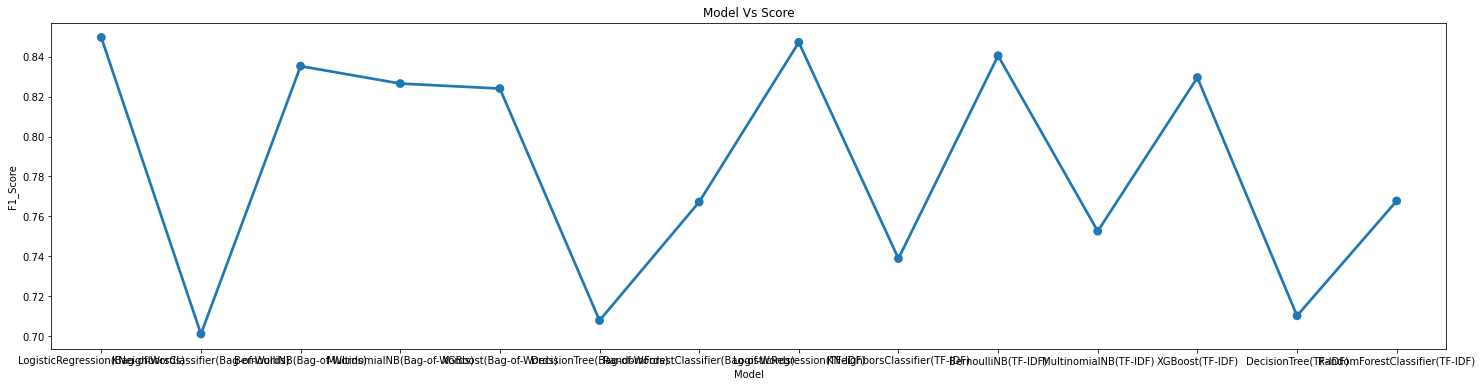

In [93]:
plt.figure(figsize=(25,6))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xsentiment('MODEL')
plt.ysentiment('SCORE')

plt.show()

## Using the best possible model to predict for the test data

#### From the above comaprison graph we can see that Logistic Regression trained using TF-IDF features gives us the best performance

In [ ]:
test_tfidf = tfidf_matrix[34000:]

In [ ]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test['sentiment'] = test_pred_int

submission = test[['sentiment']]

submission.to_csv('result.csv', index=False)

### Test dataset after prediction

In [ ]:
res = pd.read_csv('result.csv')

In [ ]:
res

# Summary

- From the given dataset we were able to predict on which class i.e Positive or Negative does the given review fall into.The following data was collected from Analytics Vidhya's site.

### Pre-processing 
1. Removing Twitter Handles(@user)
2. Removing puntuation,numbers,special characters
3. Removing short words i.e. words with length<3
4. Tokenization
5. Stemming

### Data Visualisation
1. Wordclouds
2. Barplots

### Word Embeddings used to convert words to features for our Machine Learning Model

1. Bag-of-Words 
2. TF-IDF 

### Machine Learning Models used
1. Logistic Regression
2. XGBoost
3. Decision Trees 

### Evaluation Metrics 
- F1 score

In [ ]:
sns.countplot(train_original['sentiment'])
sns.despine()

### Why use F1-Score instead of Accuracy ?

- From the above countplot generated above we see how imbalanced our dataset is.We can see that the values with sentiment:0 i.e. positive sentiments are quite high in number as compared to the values with sentiments:1 i.e. negative sentiments.


- So when we keep accuracy as our evaluation metric there may be cases where we may encounter high number of false positives.

#### Precison & Recall :- 
- Precision means the percentage of your results which are relevant.
- Recall refers to the percentage of total relevant results correctly classified by your algorithm
![met](https://cdn-images-1.medium.com/max/800/1*pOtBHai4jFd-ujaNXPilRg.png)

- We always face a trade-off situation between Precison and Recall i.e. High Precison gives low recall and vice versa.




- In most problems, you could either give a higher priority to maximizing precision, or recall, depending upon the problem you are trying to solve. But in general, there is a simpler metric which takes into account both precision and recall, and therefore, you can aim to maximize this number to make your model better. This metric is known as F1-score, which is simply the harmonic mean of precision and recall.

![f1](https://cdn-images-1.medium.com/max/800/1*DIhRgfwTcxnXJuKr2_cRvA.png)


- So this metric seems much more easier and convenient to work with, as you only have to maximize one score, rather than balancing two separate scores.